In [1]:
import xarray
import dask.multiprocessing

dask.config.set(scheduler='processes')  # overwrite default with multiprocessing scheduler

# data.meteo.unican.es

Test using files that reside on our server, in order to control the TDS environment.

In [2]:
dataset = "https://data.meteo.unican.es/thredds/dodsC/esgf/replica/variables/cordex/CORDEX_output_AFR-44_ECMWF-ERAINT_evaluation_r1i1p1_DMI-HIRHAM5_v2_day"
ds = xarray.open_dataset(dataset)

In [3]:
chunks = {k: 100 for k in ds.dims if k.startswith("time_")}
chunked = ds.chunk(chunks)

In [4]:
chunked

<xarray.Dataset>
Dimensions:         (rlat: 201, rlon: 194, time_huss: 8035, bnds: 2,
                     time_pr: 8035, time_sfcWind: 8035, time_tas: 8035,
                     time_tasmax: 8035, time_tasmin: 8035)
Coordinates: (12/15)
  * rlat            (rlat) float64 -45.76 -45.32 -44.88 ... 41.36 41.8 42.24
  * rlon            (rlon) float64 -24.64 -24.2 -23.76 ... 59.4 59.84 60.28
    height_huss     float64 ...
  * time_huss       (time_huss) datetime64[ns] 1989-01-01T12:00:00 ... 2010-1...
  * time_pr         (time_pr) datetime64[ns] 1989-01-01T12:00:00 ... 2010-12-...
    height_sfcWind  float64 ...
    ...              ...
    height_tasmax   float64 ...
  * time_tasmax     (time_tasmax) datetime64[ns] 1989-01-01T12:00:03 ... 2010...
    height_tasmin   float64 ...
  * time_tasmin     (time_tasmin) datetime64[ns] 1989-01-01T12:00:03 ... 2010...
    lat             (rlat, rlon) float64 dask.array<chunksize=(201, 194), meta=np.ndarray>
    lon             (rlat, rlon) float64 dask.array<chunksize=(201, 194), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    rotated_pole    |S64 ...
    time_bnds       (time_huss, bnds) datetime64[ns] dask.array<chunksize=(1000, 2), meta=np.ndarray>
    huss            (time_huss, rlat, rlon) float32 dask.array<chunksize=(1000, 201, 194), meta=np.ndarray>
    pr              (time_pr, rlat, rlon) float32 dask.array<chunksize=(1000, 201, 194), meta=np.ndarray>
    sfcWind         (time_sfcWind, rlat, rlon) float32 dask.array<chunksize=(1000, 201, 194), meta=np.ndarray>
    tas             (time_tas, rlat, rlon) float32 dask.array<chunksize=(1000, 201, 194), meta=np.ndarray>
    tasmax          (time_tasmax, rlat, rlon) float32 dask.array<chunksize=(1000, 201, 194), meta=np.ndarray>
    tasmin          (time_tasmin, rlat, rlon) float32 dask.array<chunksize=(1000, 201, 194), meta=np.ndarray>
Attributes: (12/24)
    CDI:                            Climate Data Interface version 1.4.0.1
    Conventions:                    CF-1.6
    CDO:                            Climate Data Operators version 1.4.0.1 (h...
    contact:                        obc@dmi.dk
    creation_date:                  2014-05-23 14:53:08
    experiment:                     Evaluation run using ERAINT as driving model
    ...                             ...
    product:                        output
    tracking_id:                    f422de04-e289-11e3-bbdd-6c626dd8513d
    NCO:                            4.0.9
    size:                           3530297110
    size_human:                     3.3 GiB
    DODS.strlen:                    0

In [5]:
%time a = chunked["tas"].mean("time_tas").compute()

CPU times: user 51.1 ms, sys: 54.6 ms, total: 106 ms
Wall time: 4min 44s


Throughput: 1.17 GiB / 4min 44s = 1198.08 MiB / 284s = 4.2 MiB/s

/home/zequi/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/zequi/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/zequi/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


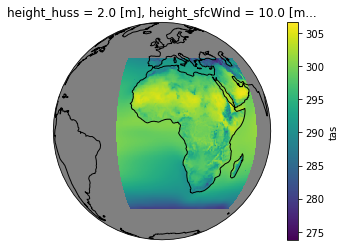

In [6]:
import cartopy.crs as ccrs

p = a.plot(
    subplot_kws=dict(projection=ccrs.Orthographic(), facecolor="gray"),
    transform=ccrs.PlateCarree())
p.axes.set_global()
p.axes.coastlines()

In [7]:
ds.close()

# ESGF

In [13]:
dataset = "http://esgdata.gfdl.noaa.gov/thredds/dodsC/gfdl_dataroot4/C4MIP/NOAA-GFDL/GFDL-ESM4/esm-ssp585/r1i1p1f1/day/snw/gr1/v20180701/snw_day_GFDL-ESM4_esm-ssp585_r1i1p1f1_gr1_20950101-21001231.nc"
ds = xarray.open_dataset(dataset)
chunked = ds.chunk({"time": 100})

In [14]:
chunked

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 2190)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * time       (time) object 2095-01-01 12:00:00 ... 2100-12-31 12:00:00
Data variables:
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
    snw        (time, lat, lon) float32 dask.array<chunksize=(1000, 180, 288), meta=np.ndarray>
    time_bnds  (time, bnds) object dask.array<chunksize=(1000, 2), meta=np.ndarray>
Attributes: (12/47)
    external_variables:              areacella
    history:                         File was processed by fremetar (GFDL ana...
    table_id:                        day
    activity_id:                     C4MIP
    branch_method:                   standard
    branch_time_in_child:            60225.0
    ...                              ...
    tracking_id:                     hdl:21.14100/08840f1e-7afe-4a1b-ac5e-e04...
    variable_id:                     snw
    variant_info:                    N/A
    references:                      see further_info_url attribute
    variant_label:                   r1i1p1f1
    DODS_EXTRA.Unlimited_Dimension:  time

In [15]:
%time a = chunked["snw"].mean("time").compute()

CPU times: user 24.1 ms, sys: 26.8 ms, total: 51 ms
Wall time: 51.6 s


Throughput: 433.08 MiB / 51.6s = 8.3 MiB/s

In [17]:
ds.close()

# ESGF Virtual Aggregation

In [24]:
dataset = "http://localhost:8080/thredds/dodsC/esgeva/CMIP6/variables/C4MIP/day/CMIP6_C4MIP_NOAA-GFDL_GFDL-ESM4_esm-ssp585_day_gr1_v20180701_esgdata.gfdl.noaa.gov.ncml"
ds = xarray.open_dataset(dataset)
chunked = ds.chunk({"variant_label": 1, "time_snw": 100})

In [25]:
chunked

<xarray.Dataset>
Dimensions:           (bnds: 2, lat: 180, lon: 288, time_mrro: 24090,
                       time_mrso: 31390, time_mrsos: 31390, time_snw: 31390,
                       variant_label: 1, nfiles: 19, further_info_url_1: 2,
                       tracking_id_1: 2)
Coordinates:
  * bnds              (bnds) float64 1.0 2.0
  * lat               (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon               (lon) float64 0.625 1.875 3.125 ... 356.9 358.1 359.4
  * time_mrro         (time_mrro) object 2035-01-30 12:00:00 ... 2101-01-29 1...
  * time_mrso         (time_mrso) object 2015-01-30 12:00:00 ... 2101-01-29 1...
  * time_mrsos        (time_mrsos) object 2015-01-30 12:00:00 ... 2101-01-29 ...
  * time_snw          (time_snw) object 2015-01-30 12:00:00 ... 2101-01-29 12...
  * variant_label     (variant_label) |S64 b'r1i1p1f1'
Dimensions without coordinates: nfiles, further_info_url_1, tracking_id_1
Data variables:
    further_info_url  (nfiles, further_info_url_1) |S64 dask.array<chunksize=(19, 2), meta=np.ndarray>
    tracking_id       (nfiles, tracking_id_1) |S64 dask.array<chunksize=(19, 2), meta=np.ndarray>
    lat_bnds          (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds          (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
    time_bnds         (time_mrro, bnds) object dask.array<chunksize=(24090, 2), meta=np.ndarray>
    mrro              (variant_label, time_mrro, lat, lon) float32 dask.array<chunksize=(1, 24090, 180, 288), meta=np.ndarray>
    mrso              (variant_label, time_mrso, lat, lon) float32 dask.array<chunksize=(1, 31390, 180, 288), meta=np.ndarray>
    mrsos             (variant_label, time_mrsos, lat, lon) float32 dask.array<chunksize=(1, 31390, 180, 288), meta=np.ndarray>
    snw               (variant_label, time_snw, lat, lon) float32 dask.array<chunksize=(1, 100, 180, 288), meta=np.ndarray>
Attributes: (12/55)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               day
    activity_id:            C4MIP
    branch_method:          no parent
    branch_time_in_child:   60225.0
    ...                     ...
    primary_variables:      mrro,mrso,mrsos,snw
    size:                   2147483647
    size_human:             6.6 GB
    cmor_version:           
    version:                vv20180701
    replica:                0

In [26]:
%time a = chunked["snw"].mean("time_snw").compute()

CPU times: user 1.16 s, sys: 576 ms, total: 1.74 s
Wall time: 4min 36s


Throughput: 6.06 GiB / 4min 36s = 6205.44 MiB / 276s = 22.48 MiB/s